<h1> Model for Digit-Recognizer. </h1>

<h3> Content </h3>

> 1. Import Libraries for data Processing
> 2. Data Analysis
> 3. Pre-processing and Normalization
> 4. Import Libraries for Modeling 
> 5. Modeling 
> 6. Evaluation
> 7. Prediction and Submission
> 8. Thank You

<h4> Import Libraries for Data Processing </h4>

In [1]:

import numpy as np # for algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

<h4> Print the shape of the Training Data and Test Data. </h4>

In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [4]:
print('Train Data Sample : ')
train.head()

Train Data Sample : 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('Test Data Sample : ')
test.head()

Test Data Sample : 


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train1 = train.iloc[:,1:].values  # set training data
y_train = train.iloc[:,0].values # set training labels
X_train1 = X_train1.reshape(42000,28,28) # reshape into a format that can be fed into our NN

<h3> Using Plotly we can visualize sample of train data for some examples </h3>

In [7]:
print(y_train[12]) # label value
px.imshow(X_train1[12],color_continuous_scale='hot') # Corresponding Data Value

1


In [8]:
print(y_train[25]) # label value
px.imshow(X_train1[25],color_continuous_scale='hot') # Corresponding Data Value

3


In [9]:
print(y_train[30]) # label value
px.imshow(X_train1[30],color_continuous_scale='hot') # Corresponding Data value

8


<h3> Let's Print a Summary of our training data to get a description  </h3>

In [10]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


* As from the train data describe we notice as all the max are about 255 and to process the data normalizing the values to a better range will help the model to run much better.

<h3> Normalization </h3>

* As all pixel values so the values will be ranging between 0-255 pixel units , data values can be normalized to have data scaled between 0 - 1 .

In [11]:
X_train1 = X_train1/255
X = X_train1
y = y_train

* Normalize the triainig data

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train, test_size=0.2, random_state=42) # split data into training and validation

In [13]:
# The same preprocessing and normalization on testing data

X_test  = test.iloc[:,0:].values
X_test = X_test / 255
X_test_org = X_test
X_test.shape

(28000, 784)

In [14]:
X_test = X_test.reshape(28000,28,28) # Respahing to a 2D image.
px.imshow(X_test[10],color_continuous_scale='hot') # Plotting example of Test data

<h3> Model </h3>

* Use a Convolutional Neural Network (CNN) model with Deep Hidden Layers

<h4> Import Libraries for Modeling of CNN </h4>

In [15]:
# Requierd Libraries for modeling Convolutional Neural Network (CNN)

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import BatchNormalization,Dense,Conv2D,Input,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [17]:
# Custom Activation Function
def leaky_relu(z, alpha=0.01):
    return tf.maximum(alpha*z, z)

def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

# Custom kernel initializer 
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

input_ = Input((28,28,1))
z = Conv2D(32, kernel_size=5, strides = 1,activation='relu',kernel_regularizer=l2(0.00004),\
           kernel_initializer=my_glorot_initializer)(input_)
z = BatchNormalization()(z)
z = MaxPooling2D(strides = 2)(z)
z = Dropout(0.2)(z)

z = Conv2D(64, kernel_size=3, activation=leaky_relu,kernel_regularizer=l2(0.00004))(z)
z = Conv2D(64, kernel_size=3,use_bias=False, activation=leaky_relu)(z)
z = BatchNormalization()(z)
z = MaxPooling2D()(z)
z = Dropout(0.2)(z)
    
z = Flatten()(z)

z = Dense(256, use_bias=False,activation=leaky_relu)(z)
z = BatchNormalization()(z)

z = Dense(128, use_bias=False,activation=leaky_relu)(z)
z = BatchNormalization()(z)

z1 = Dense(64,activation=leaky_relu)(z)
z = BatchNormalization()(z1)

z2 = Dense(64,activation=leaky_relu)(z)
z = BatchNormalization()(z2)
z = Dropout(0.2)(z)
z = tf.keras.layers.Add()([z1,z2])
z = Dense(10, use_bias=False,activation=leaky_relu)(z)

outputs = Dense(units = 10, activation = my_softplus)(z)
model = Model(inputs=input_, outputs=outputs)

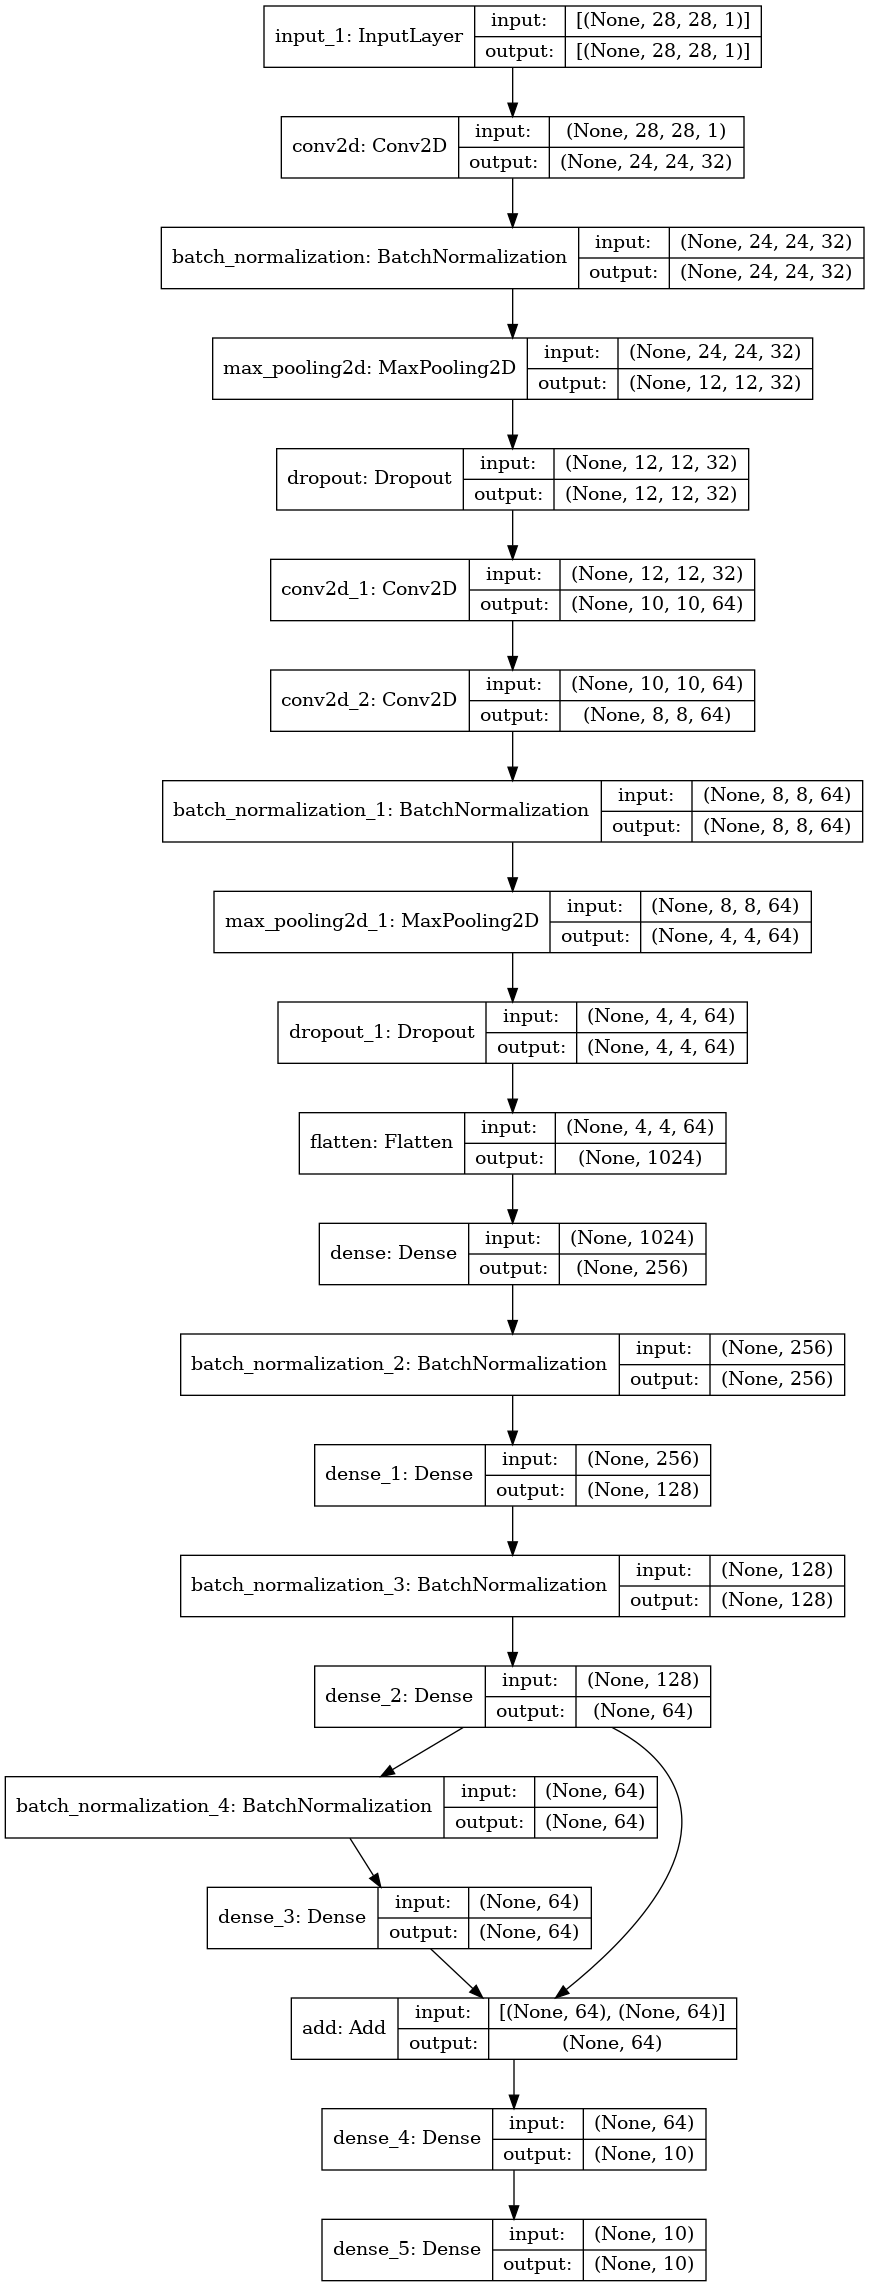

In [19]:
plot_model(model,show_shapes=True,show_layer_names=True)

<h3> Model Summary </h3>

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 12, 12, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [21]:
def scheduler(ep, lr):
    
    if ep < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

In [22]:
model.compile(
    optimizer=Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
run = model.fit(X_train, y_train, epochs=50,callbacks=callback,validation_data=(X_valid, y_valid))

Epoch 1/50
840/840 [==============================] - 33s 37ms/step - loss: 0.5892 - accuracy: 0.7327 - val_loss: 0.1245 - val_accuracy: 0.9670
Epoch 2/50
840/840 [==============================] - 31s 36ms/step - loss: 0.1171 - accuracy: 0.9688 - val_loss: 0.0629 - val_accuracy: 0.9839
Epoch 3/50
840/840 [==============================] - 30s 36ms/step - loss: 0.0862 - accuracy: 0.9779 - val_loss: 0.0600 - val_accuracy: 0.9843
Epoch 4/50
840/840 [==============================] - 30s 36ms/step - loss: 0.0720 - accuracy: 0.9810 - val_loss: 0.0547 - val_accuracy: 0.9857
Epoch 5/50
840/840 [==============================] - 31s 37ms/step - loss: 0.0621 - accuracy: 0.9841 - val_loss: 0.0499 - val_accuracy: 0.9874
Epoch 6/50
840/840 [==============================] - 31s 36ms/step - loss: 0.0555 - accuracy: 0.9862 - val_loss: 0.0454 - val_accuracy: 0.9896
Epoch 7/50
840/840 [==============================] - 30s 36ms/step - loss: 0.0459 - accuracy: 0.9881 - val_loss: 0.0463 - val_accuracy:

In [24]:
fig = px.line(y=model.history.history['accuracy'],title='Train Accuracy',template="plotly_dark")

fig.update_layout(
    
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9",title='Accuracy') 
)
fig.show()

In [25]:
fig = px.line(y=model.history.history['val_accuracy'],title='Validation Accuracy',template="plotly_dark")

fig.update_layout(
    
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9",title='Accuracy') 
)
fig.show()

In [26]:
fig = px.line(y=model.history.history['loss'],title='Train Loss',template="plotly_dark")

fig.update_layout(
    
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9",title='Loss') 
)
fig.show()

In [27]:
fig = px.line(y=model.history.history['val_loss'],title='Validation Loss',template="plotly_dark")

fig.update_layout(
    
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title='Epochs'), 
    yaxis=dict(color="#41BEE9",title='Loss') 
)
fig.show()

<h3> Evaluation of the model </h3>

* Now let's evaluate the trained model on the test dataset to validate the results

In [28]:
tval = model.evaluate(X_test,y_test)

210/210 [==============================] - 3s 11ms/step - loss: 0.0464 - accuracy: 0.9929


In [29]:
X_test_org = np.array(X_test_org).reshape(-1, 28, 28, 1)
pred = model.predict(X_test_org)

In [30]:
predictions = np.argmax(pred,axis=1)

In [31]:
submissions = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [32]:
submissions['Label'] = predictions

In [33]:
submissions.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [34]:
submissions.to_csv("submission.csv", index=False)

<h3> Conclusion </h3>

* From the model for digit recognition we achieved the following : 

In [35]:
print('Train Accuracy : {}'.format(round(max(run.history['accuracy'])*100,4)))
print('Validation Accuracy : {}'.format(round(max(run.history['val_accuracy'])*100,4)))
print('Test Accuracy : {}'.format(round(tval[1]*100,4)))

Train Accuracy : 99.9888
Validation Accuracy : 99.5
Test Accuracy : 99.2857


<h1> <b> Thank You. </b> </h1>